In [1]:
## LOAD MODULES
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## LOAD DATA

In [2]:
SDData = pd.read_csv('train_Jwzb8Zk.csv')
SDData.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1


## DESCRIBE DATA

In [3]:
SDData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   MMM-YY                19104 non-null  object
 1   Emp_ID                19104 non-null  int64 
 2   Age                   19104 non-null  int64 
 3   Gender                19104 non-null  object
 4   City                  19104 non-null  object
 5   Education_Level       19104 non-null  object
 6   Salary                19104 non-null  int64 
 7   Dateofjoining         19104 non-null  object
 8   LastWorkingDate       1616 non-null   object
 9   Joining Designation   19104 non-null  int64 
 10  Designation           19104 non-null  int64 
 11  Total Business Value  19104 non-null  int64 
 12  Quarterly Rating      19104 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 1.9+ MB


In [4]:
SDData.describe()

,Emp_ID,Age,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating
count,19104.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,1415.591133,34.650283,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,810.705321,6.264471,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,1.000000,21.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,710.000000,30.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,1417.000000,34.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,2137.000000,39.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,2788.000000,58.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


#### Next Steps:
- Tranform 'Gender' field to a dummy variable.
- Create a dummy variable for 'City'.
- Transform 'Education_Level' to a numeric field.
- Create a column 'MonInComp' (months in company) by subtracting 'Dateofjoining' from 'MMM-YY'.
- Create 'LeavingInSix' column (1 - leaving during next 6 months, 0 - not leaving).
- Create a column with a number of promotions ('N_of_promo') for each employee.
- Create a column 'PromoPace' by dividing 'N_of_promo' by 'MonInComp'.

## FEATURES ENGINEERING

In [5]:
## DUMMY FOR GENDER
SDData['Gender_Female'] = SDData.Gender.apply(lambda x: (x == 'Female')*1 + (x == 'Male')*0)
SDData.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,Gender_Female
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2,0
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2,0
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2,0
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1,0
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1,0


In [6]:
##CHECK LEVELS OF EDUCATION
SDData.Education_Level.drop_duplicates()
SDData['Education_Level'].value_counts()

Bachelor    6864
Master      6327
College     5913
Name: Education_Level, dtype: int64

In [7]:
## EDUCATION TO FACTORS
# 0 for College
# 1 for Bachelor
# 2 for Master
SDData.Education_Level = SDData.Education_Level.apply(lambda x: (x == 'College')*0 + (x == 'Bachelor')*1 + (x == 'Master')*2)
SDData.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,Gender_Female
0,2016-01-01,1,28,Male,C23,2,57387,2015-12-24,NaN,1,1,2381060,2,0
1,2016-02-01,1,28,Male,C23,2,57387,2015-12-24,NaN,1,1,-665480,2,0
2,2016-03-01,1,28,Male,C23,2,57387,2015-12-24,2016-03-11,1,1,0,2,0
3,2017-11-01,2,31,Male,C7,2,67016,2017-11-06,NaN,2,2,0,1,0
4,2017-12-01,2,31,Male,C7,2,67016,2017-11-06,NaN,2,2,0,1,0


In [8]:
## TRANSFORM DATES TO DATE TYPE & CHANGE NAME
SDData = SDData.rename(columns={'MMM-YY' : 'Date'})
SDData['Date'] = pd.to_datetime(SDData['Date'], format='%Y-%m-%d')
SDData['Dateofjoining'] = pd.to_datetime(SDData['Dateofjoining'], format='%Y-%m-%d')
SDData.head()

,Date,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,Gender_Female
0,2016-01-01,1,28,Male,C23,2,57387,2015-12-24,NaN,1,1,2381060,2,0
1,2016-02-01,1,28,Male,C23,2,57387,2015-12-24,NaN,1,1,-665480,2,0
2,2016-03-01,1,28,Male,C23,2,57387,2015-12-24,2016-03-11,1,1,0,2,0
3,2017-11-01,2,31,Male,C7,2,67016,2017-11-06,NaN,2,2,0,1,0
4,2017-12-01,2,31,Male,C7,2,67016,2017-11-06,NaN,2,2,0,1,0


In [9]:
## CALCULATE MONTHS IN COMPANY
SDData = SDData.assign(
    MonInComp=
    (SDData.Date.dt.year - SDData.Dateofjoining.dt.year) * 12 +
    (SDData.Date.dt.month - SDData.Dateofjoining.dt.month)
)
SDData.head()

,Date,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,Gender_Female,MonInComp
0,2016-01-01,1,28,Male,C23,2,57387,2015-12-24,NaN,1,1,2381060,2,0,1
1,2016-02-01,1,28,Male,C23,2,57387,2015-12-24,NaN,1,1,-665480,2,0,2
2,2016-03-01,1,28,Male,C23,2,57387,2015-12-24,2016-03-11,1,1,0,2,0,3
3,2017-11-01,2,31,Male,C7,2,67016,2017-11-06,NaN,2,2,0,1,0,0
4,2017-12-01,2,31,Male,C7,2,67016,2017-11-06,NaN,2,2,0,1,0,1


In [10]:
## NUMBER OF PROMOTIONS
SDData['N_of_promo'] =  SDData['Designation'] - SDData['Joining Designation']
SDData.head()

,Date,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,Gender_Female,MonInComp,N_of_promo
0,2016-01-01,1,28,Male,C23,2,57387,2015-12-24,NaN,1,1,2381060,2,0,1,0
1,2016-02-01,1,28,Male,C23,2,57387,2015-12-24,NaN,1,1,-665480,2,0,2,0
2,2016-03-01,1,28,Male,C23,2,57387,2015-12-24,2016-03-11,1,1,0,2,0,3,0
3,2017-11-01,2,31,Male,C7,2,67016,2017-11-06,NaN,2,2,0,1,0,0,0
4,2017-12-01,2,31,Male,C7,2,67016,2017-11-06,NaN,2,2,0,1,0,1,0


In [11]:
## PROMOTION PACE
SDData['PromoPace'] =  SDData['N_of_promo'] / SDData['MonInComp']

# When divided by 0 months 'NaN' created, therefore need to fill them with 0
SDData['PromoPace']  = SDData['PromoPace'].fillna(0)  
SDData.head()

,Date,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,Gender_Female,MonInComp,N_of_promo,PromoPace
0,2016-01-01,1,28,Male,C23,2,57387,2015-12-24,NaN,1,1,2381060,2,0,1,0,0.0
1,2016-02-01,1,28,Male,C23,2,57387,2015-12-24,NaN,1,1,-665480,2,0,2,0,0.0
2,2016-03-01,1,28,Male,C23,2,57387,2015-12-24,2016-03-11,1,1,0,2,0,3,0,0.0
3,2017-11-01,2,31,Male,C7,2,67016,2017-11-06,NaN,2,2,0,1,0,0,0,0.0
4,2017-12-01,2,31,Male,C7,2,67016,2017-11-06,NaN,2,2,0,1,0,1,0,0.0


In [12]:
## UPDATE LAST WORKING DATE
# Spread the date of leaving to employee's all rows
emplleft = SDData[SDData.LastWorkingDate.notnull()]

# Select only:
# 1.Employee ID for joining datasets in future 
# 2.Date column (the first day of the month) as Updated Last Working Date because we focus only on months
emplleft = emplleft[['Emp_ID', 'Date']]

# Rename column
emplleft = emplleft.rename(columns={'Date' : 'Updated_LastWorkDate'})

# Update column by left joining with the created dataset
SDData = pd.merge(SDData, emplleft, how = "left",on="Emp_ID")
SDData.head()

,Date,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,Gender_Female,MonInComp,N_of_promo,PromoPace,Updated_LastWorkDate
0,2016-01-01,1,28,Male,C23,2,57387,2015-12-24,NaN,1,1,2381060,2,0,1,0,0.0,2016-03-01
1,2016-02-01,1,28,Male,C23,2,57387,2015-12-24,NaN,1,1,-665480,2,0,2,0,0.0,2016-03-01
2,2016-03-01,1,28,Male,C23,2,57387,2015-12-24,2016-03-11,1,1,0,2,0,3,0,0.0,2016-03-01
3,2017-11-01,2,31,Male,C7,2,67016,2017-11-06,NaN,2,2,0,1,0,0,0,0.0,NaT
4,2017-12-01,2,31,Male,C7,2,67016,2017-11-06,NaN,2,2,0,1,0,1,0,0.0,NaT


In [13]:
## CREATE OUTPUT COLUMN 'LeavingInSix'

# Calculate difference between current month and last working month
SDData = SDData.assign(
    LeavingInSix=
    (SDData.Updated_LastWorkDate.dt.year - SDData.Date.dt.year) * 12 +
    (SDData.Updated_LastWorkDate.dt.month - SDData.Date.dt.month)
)

# If person didn't leave company during these 2 years fill in 24 months for 'NaN'
SDData['LeavingInSix']  = SDData['LeavingInSix'].fillna(24)

# If during next 6 months person leaves the company insert 1 for those months, otherwise 0
SDData.LeavingInSix = SDData.LeavingInSix.apply(lambda x: (x <= 6)*1 + (x > 6)*0)
SDData.head()

,Date,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,Gender_Female,MonInComp,N_of_promo,PromoPace,Updated_LastWorkDate,LeavingInSix
0,2016-01-01,1,28,Male,C23,2,57387,2015-12-24,NaN,1,1,2381060,2,0,1,0,0.0,2016-03-01,1
1,2016-02-01,1,28,Male,C23,2,57387,2015-12-24,NaN,1,1,-665480,2,0,2,0,0.0,2016-03-01,1
2,2016-03-01,1,28,Male,C23,2,57387,2015-12-24,2016-03-11,1,1,0,2,0,3,0,0.0,2016-03-01,1
3,2017-11-01,2,31,Male,C7,2,67016,2017-11-06,NaN,2,2,0,1,0,0,0,0.0,NaT,0
4,2017-12-01,2,31,Male,C7,2,67016,2017-11-06,NaN,2,2,0,1,0,1,0,0.0,NaT,0


## AGGREGATE ROWS

In [14]:
## EXCLUDE RECORDS OF EMPLOYEES AFTER JUNE 2017 
## SINCE DATA COVERING THE WHOLE PERIOD OF THE NEXT 6 MONTHS IS NOT AVAILABLE 

# Keep rows till June 2017 (including June)
CleanData = SDData.loc[(SDData['Date'] <= '2017-06-01') | (SDData['LeavingInSix'] == 1)]

# Sort data
CleanData = CleanData.sort_values(["Emp_ID", "Date"], ascending = (True, True))
CleanData.head()

,Date,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,Gender_Female,MonInComp,N_of_promo,PromoPace,Updated_LastWorkDate,LeavingInSix
0,2016-01-01,1,28,Male,C23,2,57387,2015-12-24,NaN,1,1,2381060,2,0,1,0,0.0,2016-03-01,1
1,2016-02-01,1,28,Male,C23,2,57387,2015-12-24,NaN,1,1,-665480,2,0,2,0,0.0,2016-03-01,1
2,2016-03-01,1,28,Male,C23,2,57387,2015-12-24,2016-03-11,1,1,0,2,0,3,0,0.0,2016-03-01,1
5,2016-12-01,4,43,Male,C13,2,65603,2016-12-07,NaN,2,2,0,1,0,0,0,0.0,2017-04-01,1
6,2017-01-01,4,43,Male,C13,2,65603,2016-12-07,NaN,2,2,0,1,0,1,0,0.0,2017-04-01,1


In [15]:
## GROUP EMPLOYEES' RECORDS BASED ON 'LeavingInSix'
AggData = CleanData.groupby(['Emp_ID','LeavingInSix','City']).agg(
    Date =  pd.NamedAgg(column = 'Date', aggfunc = max),
    MaxMonth = pd.NamedAgg(column = 'MonInComp', aggfunc = max),
    AvgMonth = pd.NamedAgg(column = 'MonInComp', aggfunc = 'mean'),
    MaxAge = pd.NamedAgg(column = 'Age', aggfunc = max),
    AvgAge = pd.NamedAgg(column = 'Age', aggfunc = 'mean'),
    Gender_Female = pd.NamedAgg(column = 'Gender_Female', aggfunc = 'mean'),
    Education = pd.NamedAgg(column = 'Education_Level', aggfunc = 'mean'),
    AvgSalary = pd.NamedAgg(column = 'Salary', aggfunc = 'mean'),
    StDevSalary = pd.NamedAgg(column = 'Salary', aggfunc = 'std'),
    MaxSalary = pd.NamedAgg(column = 'Salary', aggfunc = max),
    Designation = pd.NamedAgg(column = 'Designation', aggfunc = max),
    AvgBsnsVal = pd.NamedAgg(column = 'Total Business Value', aggfunc = 'mean'),
    StDevBsnsVal = pd.NamedAgg(column = 'Total Business Value', aggfunc = 'std'),
    AvgQR = pd.NamedAgg(column = 'Quarterly Rating', aggfunc ='mean'),
    StDevQR = pd.NamedAgg(column = 'Quarterly Rating', aggfunc = 'std'),
    CurrentQR = pd.NamedAgg(column = 'Quarterly Rating', aggfunc = 'last'),
    N_of_promo = pd.NamedAgg(column = 'N_of_promo', aggfunc = 'max'),
    PromoPace = pd.NamedAgg(column = 'PromoPace', aggfunc = 'last'))

# Substitute "NaN" in standard deviation with 0
AggData['StDevSalary']  = AggData['StDevSalary'] .fillna(0)
AggData['StDevQR']  = AggData['StDevQR'] .fillna(0)
AggData['StDevBsnsVal']  = AggData['StDevBsnsVal'] .fillna(0)
AggData = AggData.reset_index()
AggData.head()

,Emp_ID,LeavingInSix,City,Date,MaxMonth,AvgMonth,MaxAge,AvgAge,Gender_Female,Education,...,StDevSalary,MaxSalary,Designation,AvgBsnsVal,StDevBsnsVal,AvgQR,StDevQR,CurrentQR,N_of_promo,PromoPace
0,1,1,C23,2016-03-01,3,2.0,28,28.0,0,2,...,0.0,57387,1,571860.0,1.601755e+06,2.0,0.000000,2,0,0.0
1,4,1,C13,2017-04-01,4,2.0,43,43.0,0,2,...,0.0,65603,2,70000.0,1.565248e+05,1.0,0.000000,1,0,0.0
2,5,1,C9,2016-03-01,2,1.0,29,29.0,0,0,...,0.0,46368,1,40120.0,6.948988e+04,1.0,0.000000,1,0,0.0
3,8,1,C2,2017-11-01,2,1.0,34,34.0,0,0,...,0.0,70656,3,0.0,0.000000e+00,1.0,0.000000,1,0,0.0
4,12,1,C23,2016-12-01,6,3.5,35,35.0,0,2,...,0.0,28116,1,434530.0,6.620522e+05,2.5,1.643168,1,0,0.0


In [16]:
## TRANSFORM CITY TO DUMMY

# Remove 'C' string from 'City' value & create dummy variables for 28 out of 29 cities
# City 1 would be a base variable
AggData['City'] = AggData['City'].map(lambda x: x.lstrip('C'))
dummycity = pd.get_dummies(AggData.City, prefix='City').iloc[:, 1:]
AggData = pd.concat([AggData, dummycity], axis = 1)
AggData = AggData.drop(['City'],axis=1)

AggData.head()

,Emp_ID,LeavingInSix,Date,MaxMonth,AvgMonth,MaxAge,AvgAge,Gender_Female,Education,AvgSalary,...,City_27,City_28,City_29,City_3,City_4,City_5,City_6,City_7,City_8,City_9
0,1,1,2016-03-01,3,2.0,28,28.0,0,2,57387.0,...,0,0,0,0,0,0,0,0,0,0
1,4,1,2017-04-01,4,2.0,43,43.0,0,2,65603.0,...,0,0,0,0,0,0,0,0,0,0
2,5,1,2016-03-01,2,1.0,29,29.0,0,0,46368.0,...,0,0,0,0,0,0,0,0,0,1
3,8,1,2017-11-01,2,1.0,34,34.0,0,0,70656.0,...,0,0,0,0,0,0,0,0,0,0
4,12,1,2016-12-01,6,3.5,35,35.0,0,2,28116.0,...,0,0,0,0,0,0,0,0,0,0


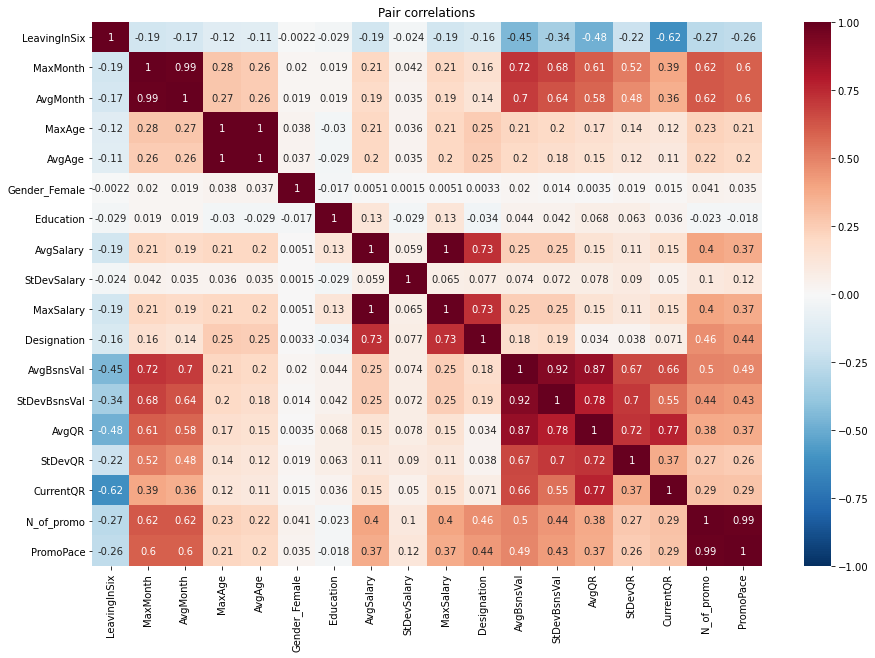

In [17]:
## CHECK CORRELATION BETWEEN VARIABLES
R = AggData[['LeavingInSix','MaxMonth','AvgMonth','MaxAge','AvgAge','Gender_Female',
             'Education','AvgSalary','StDevSalary','MaxSalary','Designation','AvgBsnsVal',
            'StDevBsnsVal','AvgQR','StDevQR','CurrentQR','N_of_promo','PromoPace']].corr(method='spearman')
plt.figure(figsize=(15, 10))
sns.heatmap(R, vmin=-1, vmax=1, cmap='RdBu_r', annot=True)
plt.title('Pair correlations')
plt.show()

#### Next Steps:
- For data about months in company I am going to use current month ('MaxMonth'). 
- For age data I will use current age ('MaxAge').
- 'Gender_Female' has very little correlation with 'LeavingInSix'. Therefore the variables will be excluded from my model.
- 'Education' will be included.
- To better describe salary in the model I am going to use 'AvgSalary' and 'StdevSalary'.
- 'Designation', 'AvgBsnsValue', 'StDevBsnsValue', 'AvgQR', and 'CurrentQR' will also be used in my model.
- 'StDevQR' will be excluded due to lower correlation than the other columns about Quarterly rating.
- 'PromoPace' calculation includes number of promotions which has higher correlation and is already included in the model. Therefore, 'PromoPace' is redundant.

 ## RUN MODELS

In [78]:
## SPLIT DATASET
x = AggData.drop(['Emp_ID','LeavingInSix','Date','AvgMonth','AvgAge','Gender_Female',
                 'MaxSalary','PromoPace','StDevQR'],axis=1)
y = AggData.LeavingInSix

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0, stratify = y)

In [79]:
## LOGISTIC REGRESSION
logistic_regression = LogisticRegression()
logistic_regression.fit(x_train,y_train)
y_predLOG = logistic_regression.predict(x_test)

In [80]:
## RANDOM FOREST
fcl = RandomForestClassifier(n_estimators = 100)
fcl.fit(x_train,y_train)
y_predFCL = fcl.predict(x_test)

## EVALUATION OF MODELS

In [81]:
## LOGISTIC REGRESSION METRICS
accLOG = metrics.accuracy_score(y_test, y_predLOG)
precLOG = metrics.precision_score(y_test, y_predLOG)
recLOG = metrics.recall_score(y_test, y_predLOG)
f1LOG = metrics.f1_score(y_test, y_predLOG)
print('LOGISTIC REGRESSION METRICS')
print('Accuracy: ',accLOG)
print('Precision: ',precLOG)
print('Recall: ',recLOG)
print('F1 score: ',f1LOG)

LOGISTIC REGRESSION METRICS
Accuracy:  0.7534791252485089
Precision:  0.7890173410404624
Recall:  0.8425925925925926
F1 score:  0.8149253731343283


In [82]:
## RANDOM FOREST METRICS
accFCL = metrics.accuracy_score(y_test, y_predFCL)
precFCL = metrics.precision_score(y_test, y_predFCL)
recFCL = metrics.recall_score(y_test, y_predFCL)
f1FCL= metrics.f1_score(y_test, y_predFCL)
print('RANDOM FOREST METRICS')
print('Accuracy: ',accFCL)
print('Precision: ',precFCL)
print('Recall: ',recFCL)
print('F1 score: ',f1FCL)

RANDOM FOREST METRICS
Accuracy:  0.8210735586481114
Precision:  0.8633540372670807
Recall:  0.8580246913580247
F1 score:  0.8606811145510836


## IMPROVING BEST MODEL (RANDOM FOREST)

Text(0.5, 257.44, 'Predicted label')

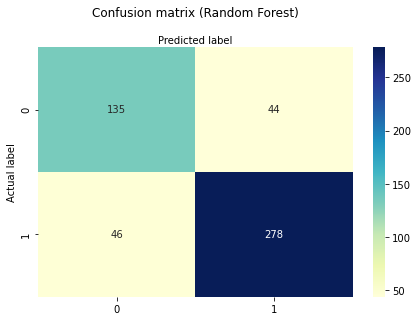

In [83]:
## CHECK PREDICTIONS VS ACTUAL DATA
cnf_matrixFCL = metrics.confusion_matrix(y_test, y_predFCL)

class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# Create a heatmap
sns.heatmap(pd.DataFrame(cnf_matrixFCL), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix (Random Forest)', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [84]:
## FEATURE IMPORTANCE
feature_imp = pd.Series(fcl.feature_importances_,index=x.columns.values).sort_values(ascending=False)
feature_imp

AvgBsnsVal      0.152099
CurrentQR       0.143513
MaxMonth        0.130760
AvgQR           0.128567
StDevBsnsVal    0.101489
AvgSalary       0.080915
MaxAge          0.067623
Designation     0.026257
Education       0.023561
N_of_promo      0.019902
City_25         0.006879
City_2          0.005553
City_20         0.005444
City_26         0.005330
City_24         0.005221
City_7          0.005152
City_14         0.005060
City_17         0.005053
City_10         0.005029
City_8          0.005023
City_18         0.004898
City_29         0.004779
City_23         0.004683
City_5          0.004530
City_21         0.004438
City_6          0.004339
City_3          0.004334
City_9          0.004178
City_15         0.003985
City_28         0.003968
City_27         0.003712
City_22         0.003503
City_4          0.003436
City_12         0.003394
City_19         0.003276
City_16         0.003218
City_11         0.003185
City_13         0.003180
StDevSalary     0.000537
dtype: float64

#### Next Steps:
- City dummy variables and 'StDevSalary' are not important features for Random Forest model. Therefore, these variables are excluded.

In [85]:
## DROP LAST FEATURE
x = x[['CurrentQR','AvgBsnsVal','MaxMonth','AvgQR','StDevBsnsVal','AvgSalary','MaxAge',
       'Designation','Education','N_of_promo']]

In [89]:
## NEW SPLIT
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0, stratify = y)

In [90]:
## RANDOM FOREST UPDATED MODEL
fclNEW = RandomForestClassifier(n_estimators = 100)
fclNEW.fit(x_train,y_train)
y_predFCL = fclNEW.predict(x_test)

In [91]:
## UPDATED RANDOM FOREST METRICS
accFCL = metrics.accuracy_score(y_test, y_predFCL)
precFCL = metrics.precision_score(y_test, y_predFCL)
recFCL = metrics.recall_score(y_test, y_predFCL)
f1FCL= metrics.f1_score(y_test, y_predFCL)
print('RANDOM FOREST METRICS')
print('Accuracy: ',accFCL)
print('Precision: ',precFCL)
print('Recall: ',recFCL)
print('F1 score: ',f1FCL)

RANDOM FOREST METRICS
Accuracy:  0.831013916500994
Precision:  0.8817891373801917
Recall:  0.8518518518518519
F1 score:  0.8665620094191523


Text(0.5, 257.44, 'Predicted label')

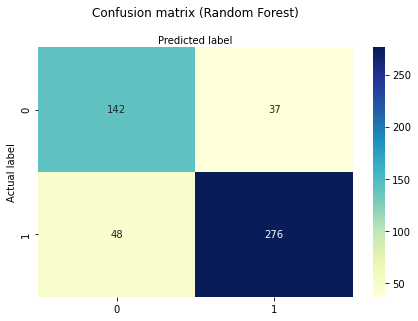

In [92]:
## CHECK PREDICTIONS VS ACTUAL DATA FOR UPDATED MODEL
cnf_matrixFCL = metrics.confusion_matrix(y_test, y_predFCL)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrixFCL), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix (Random Forest)', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')